In [112]:
import datetime
import matplotlib.pyplot as plt
file_name = input('請輸入檔案名稱：')

請輸入檔案名稱：readfile.txt


In [113]:
starttime = datetime.datetime.now()
cache = dict()       #儲存每一個被排過排列

def perm(string):    #排列函數
    global cache
    result = []
    if len(string) ==1:
        result = [string]
        return result
        
    if string in cache:     #如果被排過了 就直接從cache中拿結果
        result = cache[string]
    else:                       #沒被排過就排序 然後存進cache中
        for index, char in enumerate(string):
            for p in perm( string[ : index ] + string[ index+1 : ] ):
                result += [char + p]        
        cache[string] = result
    
    return result


In [114]:
cache_dis = dict()      #紀錄每個算過的

def distance(string):    #排列好的字串的總距離
    global cache_dis, x, y
    dis = 0.0
    for i in range(0, len(string)):
        if i == 0:
            j = len(string)-1
        else:
            j = i-1
        substring = string[i] + string[j]
        if substring not in cache_dis:
            cache_dis[substring] = ( (x[string[i]] - x[string[j]] )**2 + ( y[string[i]] - y[string[j]] )**2 )**0.5
        dis += cache_dis[substring]
    return dis


In [115]:
"""讀檔"""
f = open(file_name, "r")
lines = f.readlines()      #讀取全部內容

city_name = []                #紀錄城市名字
city_code = dict()           #為城市編碼
x = dict()                      #key:城市編碼 value:城市x座標
y = dict()                     #key:城市編碼 value:城市y座標 
code = 97                  #要用來當城市的編碼
string = ""                 #所有城市編碼的string
for i in range(0, lines.__len__(), 1):        #(開始 結束, 步長)
    j = 0
    for word in lines[i].split():
        if j == 0:
            city_name.append(word)
            city_code[chr(code)] = word
            string = string + chr(code)
        elif j == 1:
            x[chr(code)] = int(word)
        else:
            y[chr(code)] = int(word)
        j = j + 1
    code = code + 1


In [116]:
data = dict()   #紀錄該序列對應到的總距離
string0 = string[0]
string1 = string[1:]
for sub in perm(string1):
    sub = string0 + sub
    data[sub] = distance(sub)

result = ""
result_code = str(sorted(data.items(), key=lambda d: d[1])[1][0])
for v in result_code:
    result = result + city_code[v] + ' '
endtime = datetime.datetime.now()
print('Best Vist Order: ' + result)   #總距離最小的排序
print('Best Distance: ' + str(sorted(data.items(), key=lambda d: d[1])[1][1]))     #最小的總距離
print('Execution Time: '+ str((endtime - starttime).seconds) +'(s)')

Best Vist Order: 1 3 2 11 9 10 5 4 6 7 8 
Best Distance: 167.80695975880067
Execution Time: 20(s)


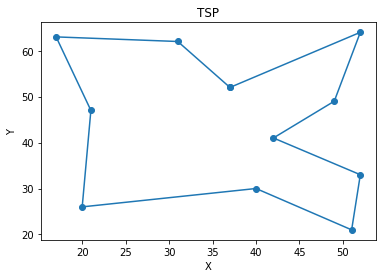

In [117]:
"""畫圖"""
X = list()
Y = list()
result_code = result_code + result_code[0]
for i in range(len(result_code)):
    X.append(x[result_code[i]])
    Y.append(y[result_code[i]])
    
plt.scatter(X, Y)
plt.plot(X, Y)
plt.title("TSP")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()